# Importing DataFrames and packages 

In [149]:
import sys
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import ttest_ind

In [163]:
import plotly.io as pio
pio.renderers.keys()
pio.renderers.default = 'jupyterlab' 

In [164]:

# Read the CSV file into a DataFrame
df_activities = pd.read_csv("C:/Users/marti/Downloads/activities_played.csv")
df_users = pd.read_csv("C:/Users/marti/Downloads/users.csv")
df_experiment = pd.read_csv("C:/Users/marti/Downloads/experiment_exposure.csv")
df_children = pd.read_csv("C:/Users/marti/Downloads/children.csv")


# Data Cleaning

In [165]:
missing_values_count = df_activities.isnull().sum()
missing_values_percentage = (df_activities.isnull().sum() / len(df_activities)) * 100
column_types = df_activities.dtypes

missing_data = pd.DataFrame({
    'Type': column_types,
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

print(missing_data)


                                  Type  Missing Values  Percentage
event_id                        object               0    0.000000
user_id                          int64               0    0.000000
child_id                         int64               0    0.000000
session_id                      object               0    0.000000
event_at                        object               0    0.000000
app_version                     object               0    0.000000
platform                        object               0    0.000000
type                            object               0    0.000000
subtype                         object            2926    0.207090
duration_int                   float64               0    0.000000
device_type                     object               0    0.000000
user_timezone                   object               0    0.000000
local_event_at                  object               0    0.000000
activity                        object               0    0.00

In [166]:
columns_to_check = ['subtype', 'source'] 
df_activities = df_activities.dropna(subset=columns_to_check)

In [167]:
#as the minimum value in the columns where the type equals float64 is 1, I will fill the missing values with 0s
float_columns = df_activities.select_dtypes(include=['float64']).columns
df_activities[float_columns] = df_activities[float_columns].fillna(0)

#filling object columns with unknown
object_columns = df_activities.select_dtypes(include=['object']).columns
df_activities[object_columns] = df_activities[object_columns].fillna('Unknown')

In [168]:
missing_values_count = df_users.isnull().sum()
missing_values_percentage = (df_users.isnull().sum() / len(df_users)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

print(missing_data)


                            Missing Values  Percentage
user_id                                  0    0.000000
registration_at                          0    0.000000
timezone                                52    8.666667
local_registration_at                    0    0.000000
event_registration_at                   44    7.333333
registration_cohort                      0    0.000000
country_code                             0    0.000000
country_name                             0    0.000000
country_region_code                    152   25.333333
country_region                         164   27.333333
city                                   155   25.833333
country                                  0    0.000000
country_group                            0    0.000000
region                                   0    0.000000
channel                                174   29.000000
network                                 86   14.333333
marketing_network                        0    0.000000
campaign  

In [169]:
#dropping all the rows with missing values as percentage of nulls per column is very low
df_users = df_users.dropna()

experiment_exposure df does not have missing values

In [170]:
missing_values_count = df_experiment.isnull().sum()
missing_values_percentage = (df_experiment.isnull().sum() / len(df_experiment)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

# print(missing_data)

In [171]:
missing_values_count = df_children.isnull().sum()
missing_values_percentage = (df_children.isnull().sum() / len(df_children)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})

print(missing_data)

                           Missing Values  Percentage
user_id                                 0    0.000000
child_id                                0    0.000000
child_added_at                          0    0.000000
child_updated_at                        0    0.000000
calculated_age                          3    0.344828
calculated_age_content                  3    0.344828
age_range                               3    0.344828
name                                    0    0.000000
avatar                                  0    0.000000
birthday                                3    0.344828
welcome_unit_completed_at              50    5.747126
deleted                                 0    0.000000


In [172]:
#dropping all the rows with missing values as percentage of nulls per column is very low
df_children = df_children.dropna()

# Content popularity analysis

#### Filter Activities:

#### Selected activities with more than 50 unique users to focus on significant participation.
#### Metrics Analyzed:

#### Identified and visualized the top 10 activities for each metric: popularity, completion rate, average duration per user, and depth.
#### Visualization:
#### Used bar charts to illustrate the top 10 activities in each metric.

In [173]:
# Define a function to categorize sources
def categorize_source(source):
    if 'lesson' in source:
        return 'Lesson'
    elif 'explore' in source:
        return 'Explore'
    elif 'multifeed' in source:
        return 'Multifeed'
    else:
        return 'Other'


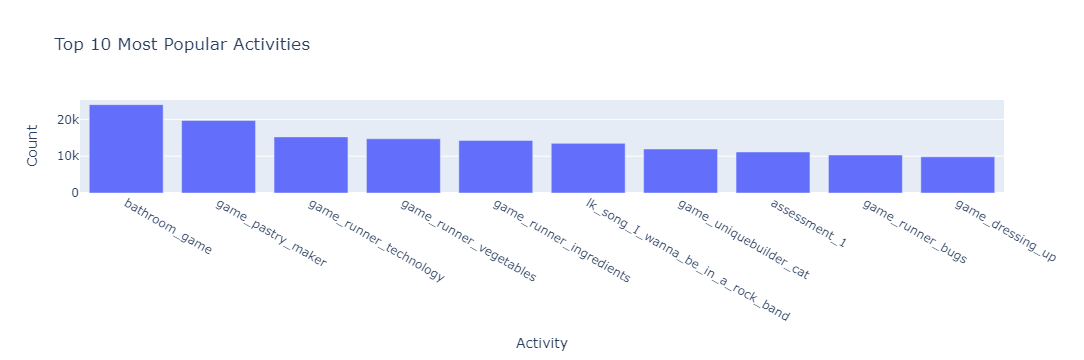

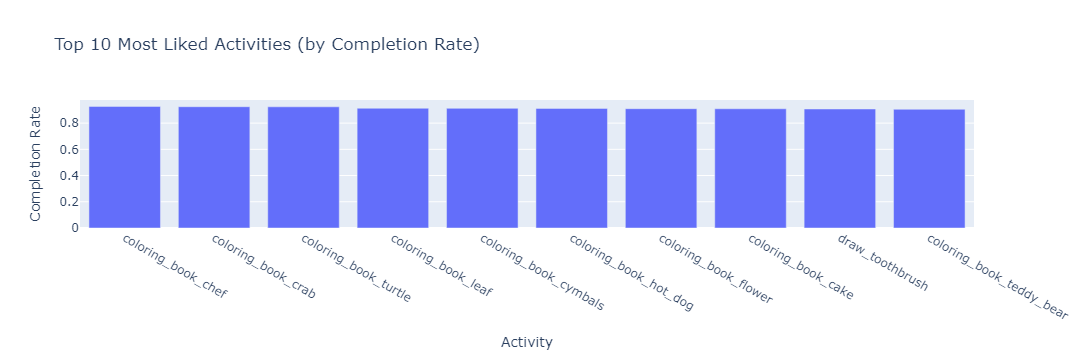

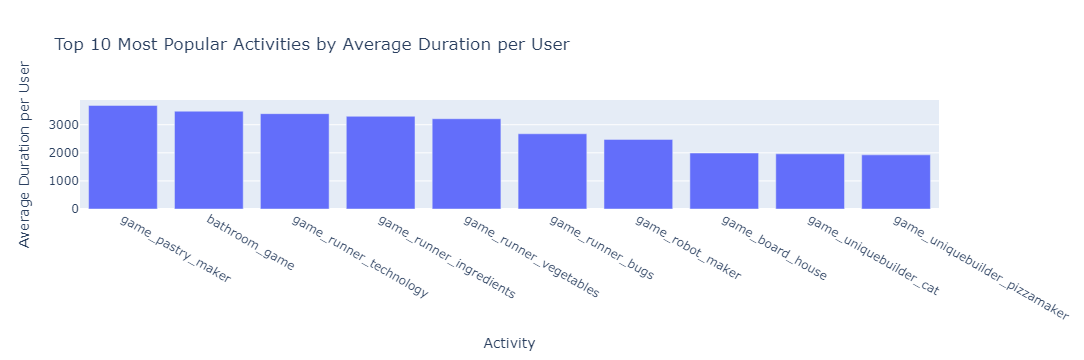

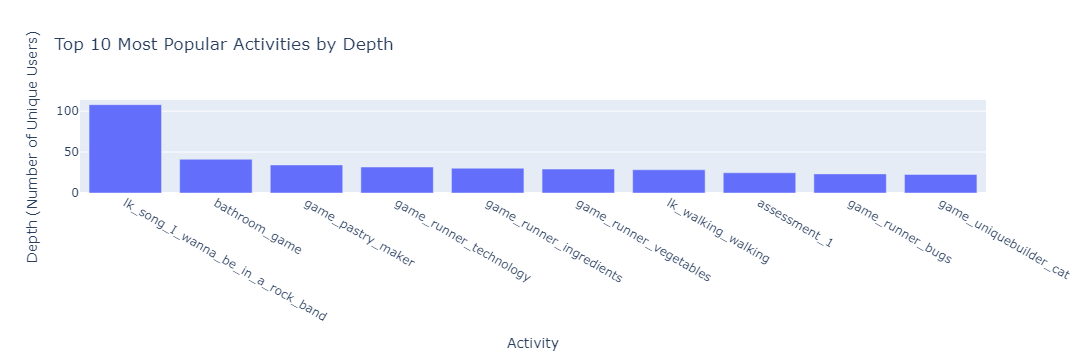

In [185]:
#filter activities that have more than 50 unique takers
activity_user_counts = df_activities.groupby('activity')['user_id'].nunique()
activities_with_50_takers = activity_user_counts[activity_user_counts > 50].index

filtered_df_activities = df_activities[df_activities['activity'].isin(activities_with_50_takers)]

#most popular activities
activity_counts = filtered_df_activities['activity'].value_counts()
fig = px.bar(activity_counts.head(10), x=activity_counts.head(10).index, y=activity_counts.head(10).values, title="Top 10 Most Popular Activities", labels={'x':'Activity', 'y':'Count'})
fig.show()


#most liked activities by completion rate
completion_rate = filtered_df_activities[filtered_df_activities['completed'] == True].groupby('activity').size() / filtered_df_activities.groupby('activity').size()
completion_rate = completion_rate.sort_values(ascending=False)
fig = px.bar(completion_rate.head(10), x=completion_rate.head(10).index, y=completion_rate.head(10).values, title="Top 10 Most Liked Activities (by Completion Rate)", labels={'x':'Activity', 'y':'Completion Rate'})
fig.show()


#most liked activities by duration
average_duration_per_user = filtered_df_activities.groupby('activity')['duration_int'].sum() / filtered_df_activities.groupby('activity')['user_id'].nunique()
average_duration_per_user = average_duration_per_user.sort_values(ascending=False)
fig = px.bar(average_duration_per_user.head(10), x=average_duration_per_user.head(10).index, y=average_duration_per_user.head(10).values, title="Top 10 Most Popular Activities by Average Duration per User", labels={'x':'Activity', 'y':'Average Duration per User'})
fig.show()

#most liked activities by depth
activity_depth = filtered_df_activities.groupby('activity')['activity'].size() / filtered_df_activities.groupby('activity')['user_id'].nunique()
activity_depth = activity_depth.sort_values(ascending=False)
fig = px.bar(activity_depth.head(10), x=activity_depth.head(10).index, y=activity_depth.head(10).values, title="Top 10 Most Popular Activities by Depth", labels={'x':'Activity', 'y':'Depth (Number of Unique Users)'})
fig.show()

#### Completion Rate:
#### Google has a higher completion rate of approximately 0.58, while Apple's completion rate is around 0.5. This suggests that users on Google's platform are more likely to finish the task or content they started.
#### Average Duration:
#### Google also shows a higher average duration of about 95 units (presumably minutes or seconds), compared to Apple's average duration of about 75 units. This indicates that users spend more time engaging with Google's platform.

#### Completion Rate by languages spoken:
#### Best: Japanese and Korean (about 65%)
#### Good: French (about 63%)
#### Lowest: Others (about 47%)


#### Average Time Spent by languages spoken:
#### Longest: Japanese (about 100 units)
#### Good: German and Korean (about 90 units)
#### Shortest: Chinese (about 65 units)

#### Sources impact different metrics differently. For completion rate, lessons perform best, while for average duration, Multifeed and Explore outperform lessons.

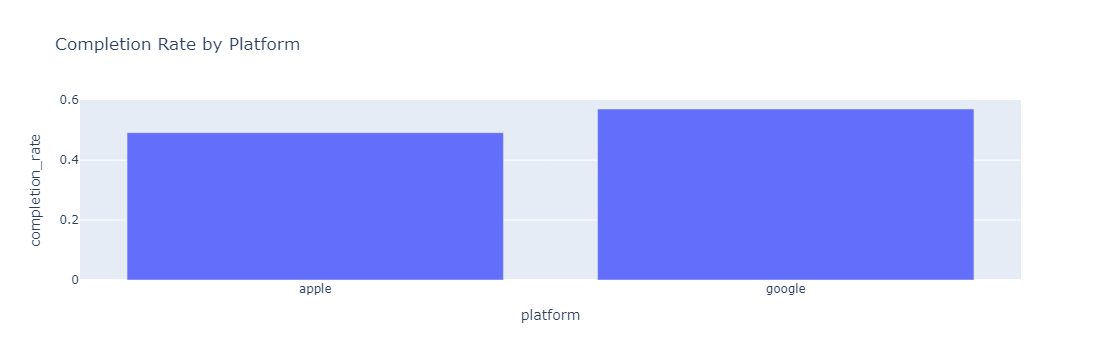

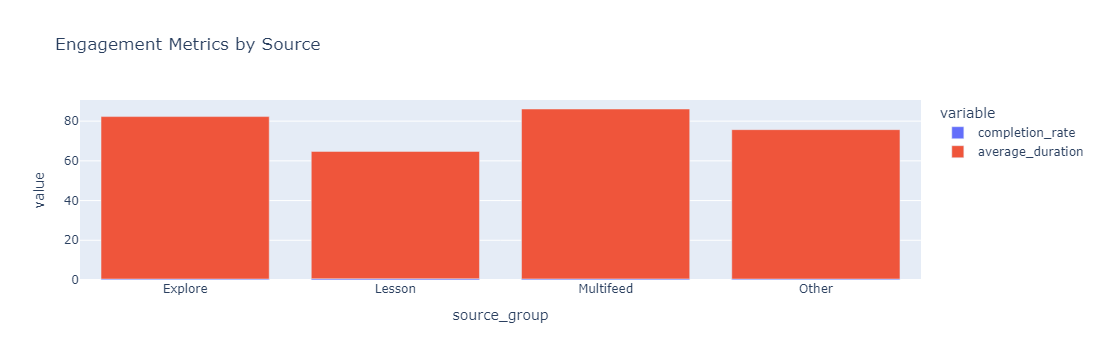

In [175]:
df_activities['completed'] = df_activities['completed'].astype(bool)

country_to_language_group = {
    'us': 'English', 'ca': 'English', 'gb': 'English', 'au': 'English', 'nz': 'English',
    'fr': 'French', 'be': 'French', 'ch': 'French',
    'de': 'German', 'at': 'German', 'ch': 'German',
    'cn': 'Chinese', 'tw': 'Chinese', 'sg': 'Chinese',
    'jp': 'Japanese',
    'in': 'Hindi',
    'es': 'Spanish', 'mx': 'Spanish', 'ar': 'Spanish', 'co': 'Spanish',
    'br': 'Portuguese', 'pt': 'Portuguese',
    'ru': 'Russian',
    'kr': 'Korean',
    'za': 'English', 'ng': 'English'
}

# Add a default group for countries not listed
df_activities['language_group'] = df_activities['country_code'].map(country_to_language_group).fillna('Others')

#source
completion_rate = df_activities.groupby('source')['completed'].mean().reset_index()
completion_rate.columns = ['source', 'completion_rate']

average_duration = df_activities.groupby('source')['duration_int'].mean().reset_index()
average_duration.columns = ['source', 'average_duration']

df_activities['source_group'] = df_activities['source'].apply(categorize_source)

#source group
completion_rate = df_activities.groupby('source_group')['completed'].mean().reset_index()
completion_rate.columns = ['source_group', 'completion_rate']

average_duration = df_activities.groupby('source_group')['duration_int'].mean().reset_index()
average_duration.columns = ['source_group', 'average_duration']


#platform
completion_rate_platform = df_activities.groupby('platform')['completed'].mean().reset_index()
completion_rate_platform.columns = ['platform', 'completion_rate']

average_duration_platform = df_activities.groupby('platform')['duration_int'].mean().reset_index()
average_duration_platform.columns = ['platform', 'average_duration']

#country
completion_rate_country = df_activities.groupby('language_group')['completed'].mean().reset_index()
completion_rate_country.columns = ['language_group', 'completion_rate']

average_duration_country = df_activities.groupby('language_group')['duration_int'].mean().reset_index()
average_duration_country.columns = ['language_group', 'average_duration']

engagement_metrics_source = pd.merge(completion_rate, average_duration, on='source_group')


fig = px.bar(completion_rate_platform, x='platform', y='completion_rate', title='Completion Rate by Platform')
fig.show()

fig = px.bar(average_duration_platform, x='platform', y='average_duration', title='Average Duration by Platform')
fig.show()

fig = px.bar(completion_rate_country, x='language_group', y='completion_rate', title='Completion Rate by Country')
fig.show()

fig = px.bar(average_duration_country, x='language_group', y='average_duration', title='Average Duration by Country')
fig.show()

fig = px.bar(engagement_metrics_source, x='source_group', y=['completion_rate', 'average_duration'], title='Engagement Metrics by Source')
fig.show()


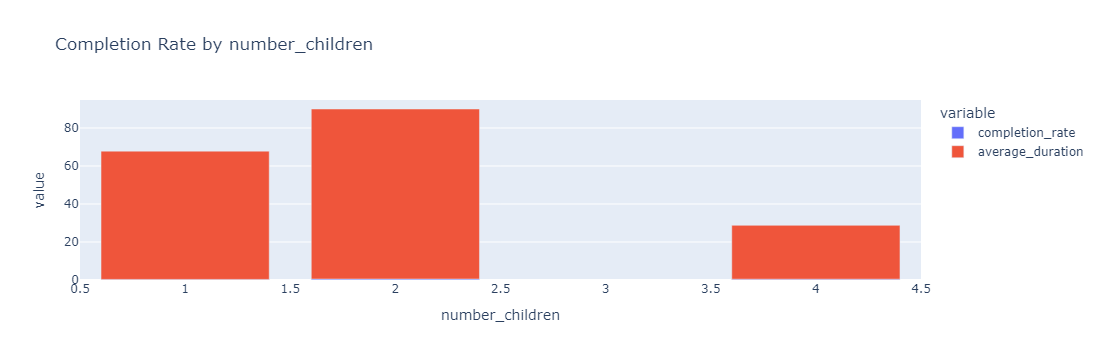

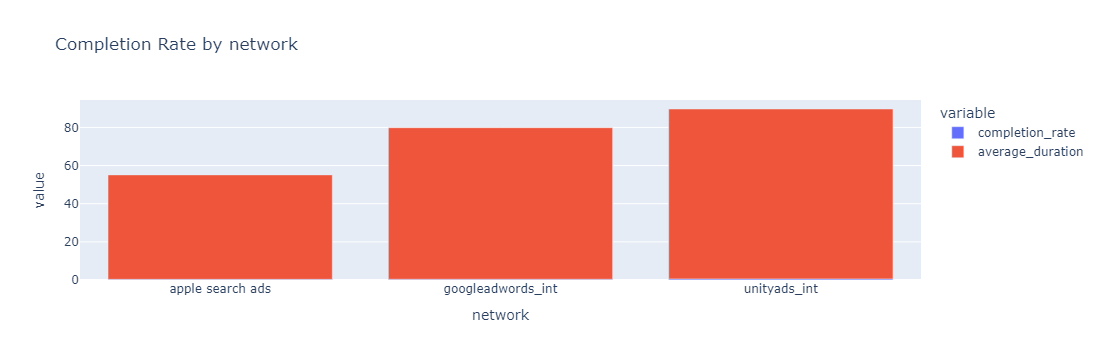

In [176]:
df_merged = pd.merge(df_activities, df_users, on=['user_id'], suffixes=('_activity', '_user'))

#country group
completion_rate_user_type = df_merged.groupby('country_group')['completed'].mean().reset_index()
completion_rate_user_type.columns = ['country_group', 'completion_rate']

average_duration_user_type = df_merged.groupby('country_group')['duration_int'].mean().reset_index()
average_duration_user_type.columns = ['country_group', 'average_duration']

user_type_source = pd.merge(completion_rate_user_type, average_duration_user_type, on='country_group')

fig = px.bar(user_type_source, x='country_group', y=['completion_rate', 'average_duration'], title='Completion Rate by country_group_user')
fig.show()

#number_children
completion_rate_number_children = df_merged.groupby('number_children')['completed'].mean().reset_index()
completion_rate_number_children.columns = ['number_children', 'completion_rate']

average_duration_number_children = df_merged.groupby('number_children')['duration_int'].mean().reset_index()
average_duration_number_children.columns = ['number_children', 'average_duration']

number_children_source = pd.merge(completion_rate_number_children, average_duration_number_children, on='number_children')

fig = px.bar(number_children_source, x='number_children', y=['completion_rate', 'average_duration'], title='Completion Rate by number_children')
fig.show()

#number_children
completion_rate_network = df_merged.groupby('network')['completed'].mean().reset_index()
completion_rate_network.columns = ['network', 'completion_rate']

average_duration_network = df_merged.groupby('network')['duration_int'].mean().reset_index()
average_duration_network.columns = ['network', 'average_duration']

network_source = pd.merge(completion_rate_network, average_duration_network, on='network')

fig = px.bar(network_source, x='network', y=['completion_rate', 'average_duration'], title='Completion Rate by network')
fig.show()


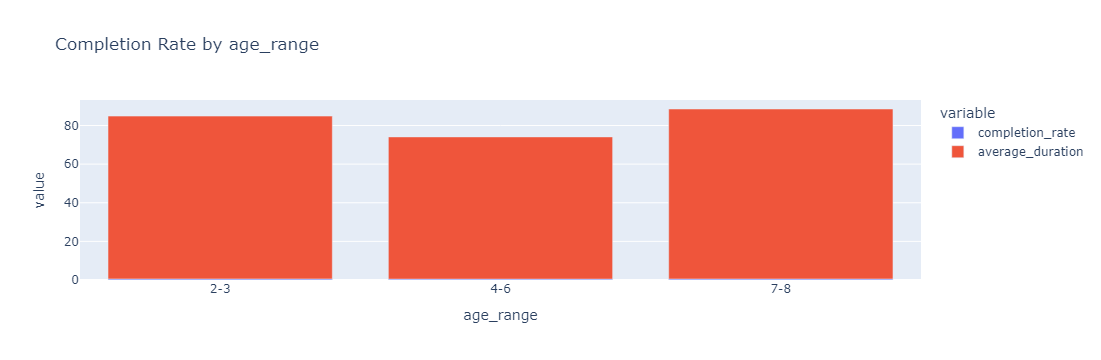

In [177]:
df_merged_child = pd.merge(df_activities, df_children, on=['child_id'], suffixes=('_activity', '_child'))
#country group
completion_rate_age_range = df_merged_child.groupby('age_range')['completed'].mean().reset_index()
completion_rate_age_range.columns = ['age_range', 'completion_rate']

average_duration_age_range = df_merged_child.groupby('age_range')['duration_int'].mean().reset_index()
average_duration_age_range.columns = ['age_range', 'average_duration']

user_type_source = pd.merge(completion_rate_age_range, average_duration_age_range, on='age_range')

fig = px.bar(user_type_source, x='age_range', y=['completion_rate', 'average_duration'], title='Completion Rate by age_range')
fig.show()


# Experiment Analysis

#### Lesson feature does not have high adoption rate among users and because of this we don't see any visible increase on completion rate and playing duration. At the end of the code we checked the significance for duration by statistical test and the difference was not significant

In [178]:
df_merged_experiment = pd.merge(df_activities, df_experiment, on=['user_id'], suffixes=('_activity', '_experiment'))
df_merged_experiment = df_merged_experiment[df_merged_experiment['event_at_activity'] > df_merged_experiment['event_at_experiment']]


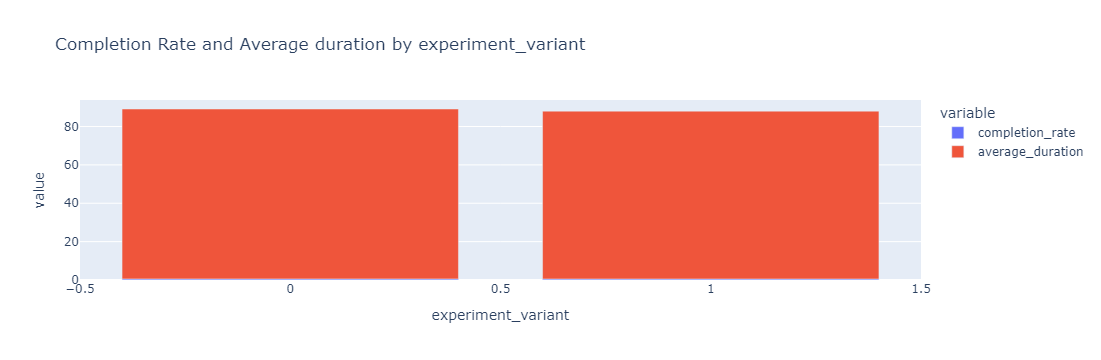

In [179]:
df_experiment_total = df_merged_experiment.copy()
completion_rate_experiment = df_experiment_total.groupby(['experiment_variant'])['completed'].mean().reset_index()
completion_rate_experiment.columns = ['experiment_variant', 'completion_rate']

average_duration_experiment = df_experiment_total.groupby(['experiment_variant'])['duration_int'].mean().reset_index()
average_duration_experiment.columns = ['experiment_variant', 'average_duration']

exteriment_total = pd.merge(completion_rate_experiment, average_duration_experiment, on='experiment_variant')

fig = px.bar(exteriment_total, x='experiment_variant', y=['completion_rate', 'average_duration'], title='Completion Rate and Average duration by experiment_variant')
fig.show()


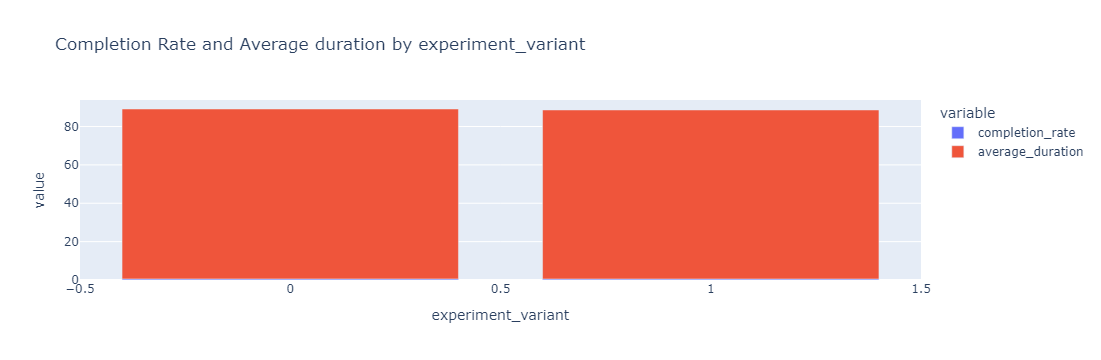

In [180]:
df_experiment_total_lesson = df_merged_experiment.copy()
df_experiment_total_lesson = df_experiment_total_lesson[~df_experiment_total_lesson['source'].str.contains('lesson')]
completion_rate_experiment = df_experiment_total_lesson.groupby(['experiment_variant'])['completed'].mean().reset_index()
completion_rate_experiment.columns = ['experiment_variant', 'completion_rate']

average_duration_experiment = df_experiment_total_lesson.groupby(['experiment_variant'])['duration_int'].mean().reset_index()
average_duration_experiment.columns = ['experiment_variant', 'average_duration']

exteriment_total = pd.merge(completion_rate_experiment, average_duration_experiment, on='experiment_variant')

fig = px.bar(exteriment_total, x='experiment_variant', y=['completion_rate', 'average_duration'], title='Completion Rate and Average duration by experiment_variant')
fig.show()

In [181]:
df_experiment_total['source_group'] = df_experiment_total['source'].apply(categorize_source)
users_per_source = df_experiment_total.groupby(['experiment_variant', 'source_group'])['completed'].sum().reset_index()
users_per_source.columns = ['experiment_variant', 'source_group','activities_completed']
users_per_source

,experiment_variant,source_group,activities_completed
0,0,Explore,2658
1,0,Multifeed,2619
2,0,Other,7129
3,1,Explore,2217
4,1,Lesson,371
5,1,Multifeed,2473
6,1,Other,7733


In [144]:
df_experiment_total['event_date'] = pd.to_datetime(df_experiment_total['event_at_activity'])
df_experiment_total['event_date'] = df_experiment_total['event_date'].dt.strftime('%Y-%m-%d')
average_duration_experiment = df_experiment_total.groupby(['experiment_variant', 'event_date'])['duration_int'].mean().reset_index()
average_duration_experiment.columns = ['experiment_variant', 'event_date', 'average_duration']
group_A = average_duration_experiment[average_duration_experiment['experiment_variant'] == 0]['average_duration']
group_B = average_duration_experiment[average_duration_experiment['experiment_variant'] == 1]['average_duration']

# Perform the t-test
t_stat, p_value = ttest_ind(group_A, group_B)

print(f"P-value: {p_value}")

P-value: 0.9684534252537846
